In [7]:
import torch
import matplotlib.pyplot as plt
from cmprs.rotations.uniform import UniformRotation

In [8]:
u_rot = UniformRotation()

In [9]:
x = torch.tensor([0., 1.])

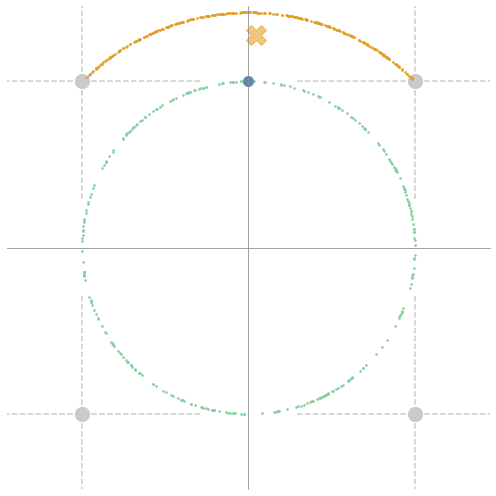

In [10]:
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(7, 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_color('#8B8B8B')
ax.spines['right'].set_color('#8B8B8B')
ax.spines['bottom'].set_color('#8B8B8B')
ax.spines['left'].set_color('#8B8B8B')

plt.ylim((-1.45, 1.45))
plt.xlim((-1.45, 1.45))
ax.set_xticks([])
ax.set_yticks([])

rotated = []
rec = []
for _ in range(300):
    A = u_rot.forward(x)
    B = u_rot.backward(torch.sign(A.tx), A.tcontext)
    rotated.append(A.tx)
    rec.append(B)

m = torch.mean(torch.stack(rec), axis=0)
rotated_xs = list(zip(*rotated))
rec = list(zip(*rec))

plt.scatter(*rotated_xs, s=10, c='#85D19F', marker='.')

plt.scatter([0], [1], s=100, c='#6485B8', marker='o')
plt.scatter([-1, 1, -1, 1],
            [-1, -1, 1, 1], s=200, c='#CACACA', marker='o')
plt.scatter([m[0]], [m[1]], s=400, c='#E3A029', alpha=0.6, marker='X')
plt.scatter([-1, 1, -1, 1],
            [-1, -1, 1, 1], s=55500, c='#CACACA', marker='+', linestyle='--')
plt.scatter(*rec, s=10, c='#E3A029', marker='.')
plt.tight_layout()
plt.savefig('bias_rotation.png', bbox_inches='tight', pad_inches=0, dpi=1200)

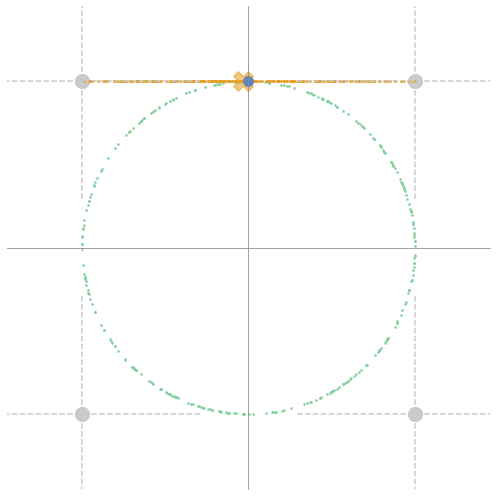

In [11]:
from cmprs.common import l1, sum_squares

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(7, 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_color('#8B8B8B')
ax.spines['right'].set_color('#8B8B8B')
ax.spines['bottom'].set_color('#8B8B8B')
ax.spines['left'].set_color('#8B8B8B')

plt.ylim((-1.45, 1.45))
plt.xlim((-1.45, 1.45))
ax.set_xticks([])
ax.set_yticks([])

rotated = []
rec = []
for _ in range(300):
    A = u_rot.forward(x)
    scale = sum_squares(A.tx) / l1(A.tx)  # <- this is the difference, we multiply by the scale
    B = u_rot.backward(torch.sign(A.tx), A.tcontext) * scale
    rotated.append(A.tx)
    rec.append(B)

m = torch.mean(torch.stack(rec), axis=0)
rotated_xs = list(zip(*rotated))
rec = list(zip(*rec))

plt.scatter(*rotated_xs, s=10, c='#85D19F', marker='.')

plt.scatter([-1, 1, -1, 1],
            [-1, -1, 1, 1], s=200, c='#CACACA', marker='o')
plt.scatter(*rec, s=10, c='#E3A029', marker='.')
plt.scatter([m[0]], [m[1]], s=400, c='#E3A029', alpha=0.6, marker='X')
plt.scatter([0], [1], s=100, c='#6485B8', marker='o')
plt.scatter([-1, 1, -1, 1],
            [-1, -1, 1, 1], s=55500, c='#CACACA', marker='+', linestyle='--')

plt.tight_layout()
# plt.savefig('unbias_rotation.png', bbox_inches='tight', pad_inches=0, dpi=1200)